In [2]:
#################################################################
# Set Working Directory
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import pickle

import sys
sys.path.append('/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/')

#from MDPtools import *
from model import MDP_model
from maze_functions import createSamples, opt_maze_trajectory, opt_model_trajectory, fitted_Q, \
    get_maze_transition_reward, policy_accuracy, fitted_Q_policy_accuracy
from testing import cluster_size, next_clusters, training_value_error, purity

In [3]:
# Set Parameters
#N = 170
T_max = 25
max_k = 25
clustering = 'Agglomerative'
n_clusters = None
distance_threshold = 0.5
random_state = 0
pfeatures = 2
actions = [0, 1, 2, 3]
h = -1
cv = 5
th = 0
classification = 'DecisionTreeClassifier'
#classification = 'RandomForestClassifier'
split_classifier_params = {'random_state':0, 'max_depth':2}

In [4]:
# list of maze options to choose from:
mazes = {1: 'maze-v0',
         2: 'maze-sample-3x3-v0',
         3: 'maze-random-3x3-v0',
         4: 'maze-sample-5x5-v0',
         5: 'maze-random-5x5-v0',
         6: 'maze-sample-10x10-v0',
         7: 'maze-random-10x10-v0',
         8: 'maze-sample-100x100-v0',
         9: 'maze-random-100x100-v0',
         10: 'maze-random-10x10-plus-v0', # has portals 
         11: 'maze-random-20x20-plus-v0', # has portals 
         12: 'maze-random-30x30-plus-v0'} # has portals 

In [3]:
# Set Ns we want to investigate
Ns = [2, 3, 5]

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

Clusters Initialized
    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0    0     0   0.945199  -0.450422      2 -0.004           0        0   
1    0     1   1.519087  -0.565061      2 -0.004           1        0   
2    0     2   2.915137  -0.751483      1 -0.004           2        0   
3    0     3   2.968668  -1.220494      2 -0.004           7        0   
4    0     4   2.413339  -1.154717      1 -0.004           7        0   
5    0     5   2.609639  -2.493043      1 -0.004          12        0   
6    0     6   2.570820  -3.287558      2 -0.004          17        0   
7    0     7   2.632937  -3.793000      1 -0.004          17        0   
8    0     8   2.357540  -4.372877      1 -0.004          22        0   
9    0     9   2.729598  -4.606296      2 -0.004          22        0   
10   0    10   3.434102  -4.873066      0 -0.004          23        0   
11   0    11   3.955879  -3.783136      0 -0.004          18        0   
12   0    12   3.891990  -2.79

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:01<00:04,  4.20it/s]

Splitting... |#Clusters:8:  26%|██▌       | 6/23 [00:01<00:04,  3.86it/s]

Splitting... |#Clusters:9:  30%|███       | 7/23 [00:01<00:04,  3.59it/s]

Splitting... |#Clusters:10:  35%|███▍      | 8/23 [00:02<00:04,  3.39it/s]

Splitting... |#Clusters:11:  39%|███▉      | 9/23 [00:02<00:04,  3.38it/s]

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:02<00:04,  2.96it/s]

Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:03<00:04,  2.77it/s]

Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:03<00:03,  2.93it/s]

Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:03<00:03,  3.13it/s]

Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:04<00:02,  3.28it/s]

Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:04<00:02,  3.27it/s]

Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:04<00:02,  3.27it/s]

Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:04<00:01,  3.36it/s]

Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:05<00:01,  3.50it/s]


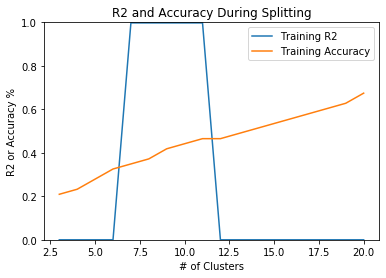

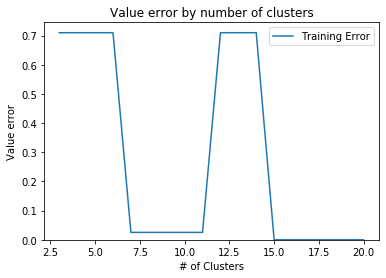

Splitting... |#Clusters:7:  38%|███▊      | 5/13 [00:00<00:01,  4.85it/s]

Splitting... |#Clusters:8:  46%|████▌     | 6/13 [00:01<00:01,  4.13it/s]

Splitting... |#Clusters:9:  54%|█████▍    | 7/13 [00:01<00:01,  3.83it/s]

Splitting... |#Clusters:10:  62%|██████▏   | 8/13 [00:01<00:01,  3.66it/s]

Splitting... |#Clusters:11:  69%|██████▉   | 9/13 [00:02<00:01,  3.51it/s]

Splitting... |#Clusters:12:  77%|███████▋  | 10/13 [00:02<00:00,  3.45it/s]

Splitting... |#Clusters:13:  85%|████████▍ | 11/13 [00:02<00:00,  3.42it/s]

Splitting... |#Clusters:14:  92%|█████████▏| 12/13 [00:03<00:00,  3.37it/s]

Splitting... |#Clusters:14:  92%|█████████▏| 12/13 [00:03<00:00,  3.52it/s]

Optimal # of clusters reached


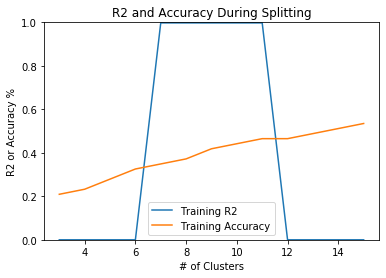

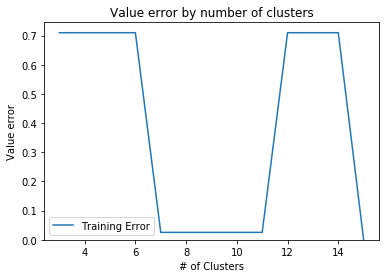

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0    0     0   0.945199  -0.450422      2 -0.004           0   
1    0     1   1.519087  -0.565061      2 -0.004           1   
2    0     2   2.915137  -0.751483      1 -0.004           2   
3    0     3   2.968668  -1.220494      2 -0.004           7   
4    0     4   2.413339  -1.154717      1 -0.004           7   
5    0     5   2.609639  -2.493043      1 -0.004          12   
6    0     6   2.570820  -3.287558      2 -0.004          17   
7    0     7   2.632937  -3.793000      1 -0.004          17   
8    0     8   2.357540  -4.372877      1 -0.004          22   
9    0     9   2.729598  -4.606296      2 -0.004          22   
10   0    10   3.434102  -4.873066      0 -0.004          23   
11   0    11   3.955879  -3.783136      0 -0.004          18   
12   0    12   3.891990  -2.797126      0 -0.004          13   
13   0    13   3.140949  -1.388589      2 -0.004           8   
14   0    14   4.684396  -1.984230      

New training features
    FEATURE_0  FEATURE_1 ACTION
0    0.945199  -0.450422      2
1    1.519087  -0.565061      2
2    2.915137  -0.751483      1
3    2.968668  -1.220494      2
4    2.413339  -1.154717      1
5    2.609639  -2.493043      1
6    2.570820  -3.287558      2
7    2.632937  -3.793000      1
8    2.357540  -4.372877      1
9    2.729598  -4.606296      2
10   3.434102  -4.873066      0
11   3.955879  -3.783136      0
12   3.891990  -2.797126      0
13   3.140949  -1.388589      2
14   4.684396  -1.984230      1
15   4.886250  -2.939611      1
16   4.311364  -3.984780      1
17   4.806505  -4.708546      4
18   0.763667  -0.705527      2
19   1.141057  -0.450061      1
20   1.195122  -1.702429      1
21   1.475052  -2.143189      0
22   1.393695  -1.559586      0
23   1.994040  -0.426111      2
24   2.513581  -0.483613      1
25   2.193643  -1.990063      3
26   2.352242  -1.264183      1
27   2.757072  -2.300996      1
28   2.501201  -3.776288      1
29   2.420129  -4.

100%|██████████| 100/100 [01:05<00:00,  1.52it/s]


N= 2  completed


Splitting... |#Clusters:3:   4%|▍         | 1/23 [00:00<00:03,  6.61it/s]

Clusters Initialized
    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0    0     0   0.935456  -0.257430      2 -0.004           0        0   
1    0     1   1.777537  -0.525098      2 -0.004           1        0   
2    0     2   2.698330  -0.690030      0 -0.004           2        0   
3    0     3   2.902483  -0.721617      2 -0.004           2        0   
4    0     4   2.380671  -0.940479      1 -0.004           2        0   
..  ..   ...        ...        ...    ...    ...         ...      ...   
68   2    20   3.298740  -3.498070      1 -0.004          18        0   
69   2    21   3.816923  -4.764865      0 -0.004          23        0   
70   2    22   3.660140  -3.364731      0 -0.004          18        0   
71   2    23   3.760105  -2.681244      0 -0.004          13        0   
72   2    24   3.912037  -1.615097      2 -0.004           8        0   

   NEXT_CLUSTER  
0             0  
1             0  
2             0  
3             0  
4           

Splitting... |#Clusters:9:  30%|███       | 7/23 [00:01<00:05,  3.13it/s]

Splitting... |#Clusters:10:  35%|███▍      | 8/23 [00:02<00:05,  2.79it/s]

Splitting... |#Clusters:11:  39%|███▉      | 9/23 [00:02<00:05,  2.47it/s]

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:03<00:05,  2.44it/s]

Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:03<00:05,  2.27it/s]

Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:04<00:04,  2.31it/s]

Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:04<00:04,  2.36it/s]

Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:05<00:03,  2.39it/s]

Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:05<00:03,  2.29it/s]

Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:06<00:03,  2.22it/s]

Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:06<00:02,  2.19it/s]

Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:06<00:02,  2.22it/s]

Splitting... |#Clusters:21:  83%|████████▎ | 19/23 [00:07<00:01,  2.24it/s]

Splitting... |#Clusters:22:  87%|████████▋ | 20/23 [00:07<00:01,  2.29it/s]

Splitting... |#Clusters:23:  91%|█████████▏| 21/23 [00:08<00:00,  2.32it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:08<00:00,  2.33it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:09<00:00,  2.44it/s]

Optimal # of clusters reached


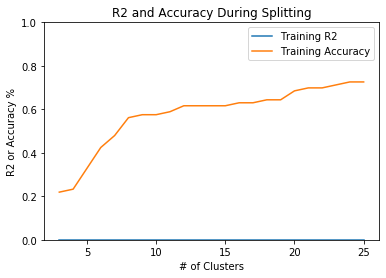

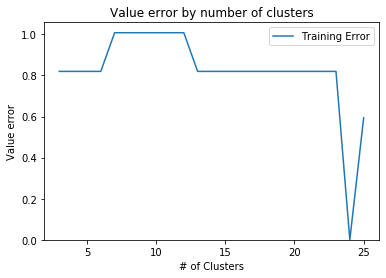

Splitting... |#Clusters:9:  32%|███▏      | 7/22 [00:02<00:05,  2.95it/s]

Splitting... |#Clusters:10:  36%|███▋      | 8/22 [00:02<00:05,  2.64it/s]

Splitting... |#Clusters:11:  41%|████      | 9/22 [00:03<00:05,  2.47it/s]

Splitting... |#Clusters:12:  45%|████▌     | 10/22 [00:03<00:05,  2.37it/s]

Splitting... |#Clusters:13:  50%|█████     | 11/22 [00:03<00:04,  2.38it/s]

Splitting... |#Clusters:14:  55%|█████▍    | 12/22 [00:04<00:04,  2.27it/s]

Splitting... |#Clusters:15:  59%|█████▉    | 13/22 [00:04<00:03,  2.35it/s]

Splitting... |#Clusters:16:  64%|██████▎   | 14/22 [00:05<00:03,  2.38it/s]

Splitting... |#Clusters:17:  68%|██████▊   | 15/22 [00:05<00:03,  2.27it/s]

Splitting... |#Clusters:18:  73%|███████▎  | 16/22 [00:06<00:02,  2.21it/s]

Splitting... |#Clusters:19:  77%|███████▋  | 17/22 [00:06<00:02,  2.17it/s]

Splitting... |#Clusters:20:  82%|████████▏ | 18/22 [00:07<00:01,  2.22it/s]

Splitting... |#Clusters:21:  86%|████████▋ | 19/22 [00:07<00:01,  2.21it/s]

Splitting... |#Clusters:22:  91%|█████████ | 20/22 [00:07<00:00,  2.26it/s]

Splitting... |#Clusters:23:  95%|█████████▌| 21/22 [00:08<00:00,  2.39it/s]

Splitting... |#Clusters:23:  95%|█████████▌| 21/22 [00:08<00:00,  2.42it/s]

Optimal # of clusters reached


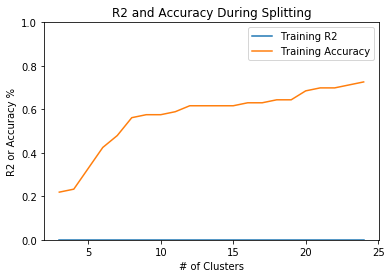

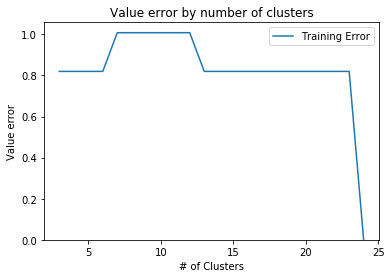

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0    0     0   0.935456  -0.257430      2 -0.004           0   
1    0     1   1.777537  -0.525098      2 -0.004           1   
2    0     2   2.698330  -0.690030      0 -0.004           2   
3    0     3   2.902483  -0.721617      2 -0.004           2   
4    0     4   2.380671  -0.940479      1 -0.004           2   
..  ..   ...        ...        ...    ...    ...         ...   
68   2    20   3.298740  -3.498070      1 -0.004          18   
69   2    21   3.816923  -4.764865      0 -0.004          23   
70   2    22   3.660140  -3.364731      0 -0.004          18   
71   2    23   3.760105  -2.681244      0 -0.004          13   
72   2    24   3.912037  -1.615097      2 -0.004           8   

                                         x_t2  \
0    [1.546516346170986, -0.2689755792571463]   
1   [2.7835006397829547, -0.8592044430225955]   
2   [2.4313246521399825, -0.5132178962172803]   
3    [2.450914782524976, -0.8631965

100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


N= 3  completed


Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.061180  -0.064887      2 -0.004           0        0   
1     0     1   1.170047  -0.481861      2 -0.004           1        0   
2     0     2   2.540744  -0.647057      1 -0.004           2        0   
3     0     3   2.632536  -1.774652      2 -0.004           7        0   
4     0     4   2.428192  -1.939265      0 -0.004           7        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
108   4    17   3.754084  -1.800230      2 -0.004           8        0   
109   4    18   4.186384  -1.009100      1 -0.004           9        0   
110   4    19   4.450161  -2.580753      1 -0.004          14        0   
111   4    20   4.983930  -3.503513      1 -0.004          19        0   
112   4    21   4.869188  -4.587718   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0  
3             

Splitting... |#Clusters:9:  30%|███       | 7/23 [00:02<00:06,  2.44it/s]

Splitting... |#Clusters:10:  35%|███▍      | 8/23 [00:03<00:06,  2.17it/s]

Splitting... |#Clusters:11:  39%|███▉      | 9/23 [00:03<00:06,  2.11it/s]

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:04<00:07,  1.70it/s]

Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:05<00:07,  1.51it/s]

Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:06<00:06,  1.58it/s]

Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:06<00:06,  1.53it/s]

Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:07<00:05,  1.62it/s]

Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:08<00:04,  1.72it/s]

Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:08<00:03,  1.80it/s]

Splitting... |#Clusters:21:  83%|████████▎ | 19/23 [00:09<00:02,  1.91it/s]

Splitting... |#Clusters:22:  87%|████████▋ | 20/23 [00:10<00:01,  1.93it/s]

Splitting... |#Clusters:23:  91%|█████████▏| 21/23 [00:10<00:00,  2.01it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:11<00:00,  2.09it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:11<00:00,  1.89it/s]

Optimal # of clusters reached


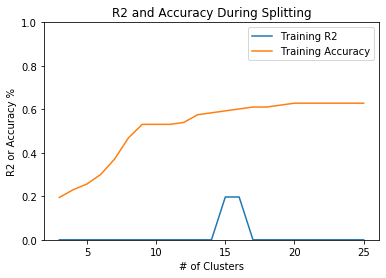

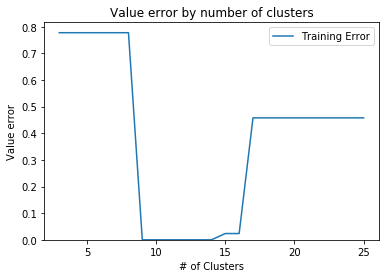

Splitting... |#Clusters:8:  86%|████████▌ | 6/7 [00:02<00:00,  2.78it/s]

Optimal # of clusters reached


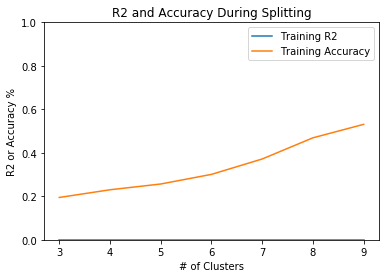

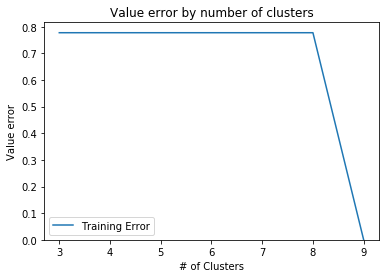

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0     0     0   0.061180  -0.064887      2 -0.004           0   
1     0     1   1.170047  -0.481861      2 -0.004           1   
2     0     2   2.540744  -0.647057      1 -0.004           2   
3     0     3   2.632536  -1.774652      2 -0.004           7   
4     0     4   2.428192  -1.939265      0 -0.004           7   
..   ..   ...        ...        ...    ...    ...         ...   
108   4    17   3.754084  -1.800230      2 -0.004           8   
109   4    18   4.186384  -1.009100      1 -0.004           9   
110   4    19   4.450161  -2.580753      1 -0.004          14   
111   4    20   4.983930  -3.503513      1 -0.004          19   
112   4    21   4.869188  -4.587718   None  1.000          24   

                                           x_t2  \
0    [1.3729469291230654, -0.15252190463826287]   
1      [2.500339614236047, -0.6049026381873341]   
2      [2.232451912759343, -1.4663902469196168]   
3     [2.502388

100%|██████████| 100/100 [03:09<00:00,  1.89s/it]

N= 5  completed


In [10]:
# creating new dataset and saving model and policies
ms = []
ps = []
for n in Ns:
    N = n
    df = createSamples(N, T_max, mazes[4], 0.4, reseed=True)
    df.to_csv('N=%i.csv'%n)
    
    m = MDP_model()
    m.fit(df, # df: dataframe in the format ['ID', 'TIME', ...features..., 'RISK', 'ACTION']
        pfeatures, # int: number of features
        h, # int: time horizon (# of actions we want to optimize)
        max_k, # int: number of iterations
        distance_threshold, # clustering diameter for Agglomerative clustering
        cv, # number for cross validation
        th, # splitting threshold
        classification, # classification method
        split_classifier_params, # classification params
        clustering,# clustering method from Agglomerative, KMeans, and Birch
        n_clusters, # number of clusters for KMeans
        random_state,
        plot=True, 
        optimize=True)
    ms.append(m)
    pickle.dump(m, open('model_N=%i.sav'%n, 'wb'))
    
    f, r = get_maze_transition_reward(mazes[4])
    Q, p, x_df = fitted_Q(100, df, 0.98, 2, [0, 1, 2, 3], f, r, True, 'ExtraTrees')
    pickle.dump(p, open('fitted_Q_policy_N=%i.sav'%n, 'wb'))
    ps.append(p)
    print('N=', n, ' completed')

Optimal Value: [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.3495712e-10
 0.0000000e+00]
Optimal Policy: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Maze/maze_functions.py:160: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:654: RuntimeWarning: invalid value encountered in true_divide
  lengths = np.hypot(*dxy.T) / eps
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:678: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:748: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:762: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength

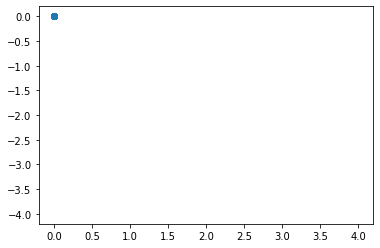

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-0.,  0.,  0., ...,  0.,  0.,  0.]))

In [11]:
opt_model_trajectory(ms[1], mazes[4])

In [17]:
policy_accuracy(ms[2], mazes[4], ms[2].df)

Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


0.18584070796460178

In [18]:
fitted_Q_policy_accuracy(ps[1], mazes[4], ms[1].df)

Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


0.410958904109589

In [4]:
N = 200
df_full = createSamples(N, T_max, mazes[4], 0.4, reseed=True)
df_full.to_csv('N=200.csv')

pygame 2.0.0.dev10 (SDL 2.0.12, python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
# Loading csv
filename = 'N=30.csv'
df = pd.read_csv(filename)

# taking out extra ID col and changing actions back to integers
df = df.iloc[:, 1:]
df.loc[df['ACTION']=='None', 'ACTION'] = 4
df['ACTION'] = pd.to_numeric(df['ACTION'], downcast='integer')
df.loc[df['ACTION']==4, 'ACTION'] = 'None'
df_full = df

In [20]:
Ns = [2, 3, 5]

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

Clusters Initialized
    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0    0     0   0.877380  -0.022002      0 -0.004           0        0   
1    0     1   0.697367  -0.838886      2 -0.004           0        0   
2    0     2   1.243616  -0.187872      0 -0.004           1        0   
3    0     3   1.194918  -0.284411      2 -0.004           1        0   
4    0     4   2.195323  -0.764018      1 -0.004           2        0   
5    0     5   2.159470  -1.158964      1 -0.004           7        0   
6    0     6   2.672219  -2.688341      1 -0.004          12        0   
7    0     7   2.581690  -3.977404      1 -0.004          17        0   
8    0     8   2.837970  -4.479477      2 -0.004          22        0   
9    0     9   3.420578  -4.937371      0 -0.004          23        0   
10   0    10   3.761668  -3.757345      0 -0.004          18        0   
11   0    11   3.253474  -2.695966      0 -0.004          13        0   
12   0    12   3.943273  -1.19

Splitting... |#Clusters:10:  35%|███▍      | 8/23 [00:02<00:04,  3.59it/s]

Splitting... |#Clusters:11:  39%|███▉      | 9/23 [00:02<00:04,  3.45it/s]

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:02<00:03,  3.55it/s]

Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:03<00:03,  3.67it/s]

Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:03<00:03,  3.63it/s]


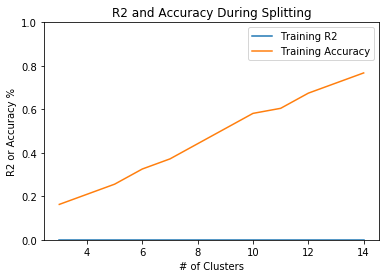

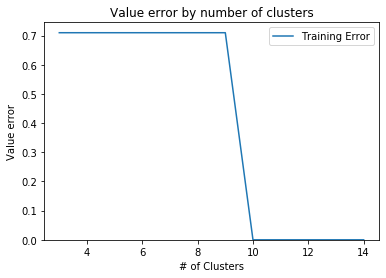

Splitting... |#Clusters:9:  88%|████████▊ | 7/8 [00:02<00:00,  2.48it/s]

Optimal # of clusters reached


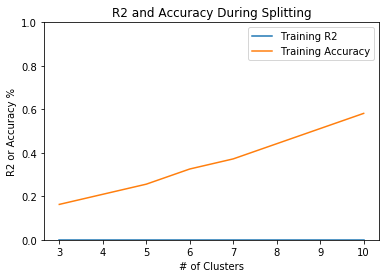

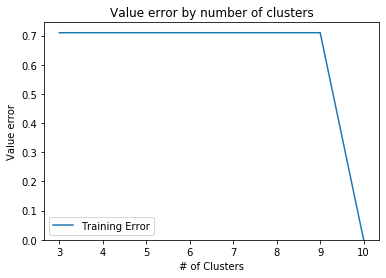

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0    0     0   0.877380  -0.022002      0 -0.004           0   
1    0     1   0.697367  -0.838886      2 -0.004           0   
2    0     2   1.243616  -0.187872      0 -0.004           1   
3    0     3   1.194918  -0.284411      2 -0.004           1   
4    0     4   2.195323  -0.764018      1 -0.004           2   
5    0     5   2.159470  -1.158964      1 -0.004           7   
6    0     6   2.672219  -2.688341      1 -0.004          12   
7    0     7   2.581690  -3.977404      1 -0.004          17   
8    0     8   2.837970  -4.479477      2 -0.004          22   
9    0     9   3.420578  -4.937371      0 -0.004          23   
10   0    10   3.761668  -3.757345      0 -0.004          18   
11   0    11   3.253474  -2.695966      0 -0.004          13   
12   0    12   3.943273  -1.198892      3 -0.004           8   
13   0    13   3.319916  -1.152108      2 -0.004           8   
14   0    14   4.831362  -1.657778      

New training features
    FEATURE_0  FEATURE_1 ACTION
0    0.877380  -0.022002      0
1    0.697367  -0.838886      2
2    1.243616  -0.187872      0
3    1.194918  -0.284411      2
4    2.195323  -0.764018      1
5    2.159470  -1.158964      1
6    2.672219  -2.688341      1
7    2.581690  -3.977404      1
8    2.837970  -4.479477      2
9    3.420578  -4.937371      0
10   3.761668  -3.757345      0
11   3.253474  -2.695966      0
12   3.943273  -1.198892      3
13   3.319916  -1.152108      2
14   4.831362  -1.657778      1
15   4.294576  -2.027258      1
16   4.805961  -3.733223      1
17   4.898834  -4.481050      4
18   0.321454  -0.627218      2
19   1.085346  -0.294924      2
20   2.888028  -0.479960      1
21   2.231688  -1.188887      3
22   2.039955  -1.825072      1
23   2.011798  -2.566105      1
24   2.305226  -3.814970      3
25   2.179751  -3.860991      0
26   2.471489  -2.009591      1
27   2.513978  -3.662488      1
28   2.911400  -4.831281      0
29   2.486032  -3.

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

N= 2  completed
Clusters Initialized
    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0    0     0   0.877380  -0.022002      0 -0.004           0        0   
1    0     1   0.697367  -0.838886      2 -0.004           0        0   
2    0     2   1.243616  -0.187872      0 -0.004           1        0   
3    0     3   1.194918  -0.284411      2 -0.004           1        0   
4    0     4   2.195323  -0.764018      1 -0.004           2        0   
..  ..   ...        ...        ...    ...    ...         ...      ...   
63   2    20   3.399181  -2.435424      2 -0.004          13        0   
64   2    21   3.951357  -2.126681      0 -0.004          13        0   
65   2    22   3.749557  -1.351670      2 -0.004           8        0   
66   2    23   4.730149  -1.862744      1 -0.004           9        0   
67   2    24   4.713666  -2.726934      1 -0.004          14        0   

   NEXT_CLUSTER  
0             0  
1             0  
2             0  
3             

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:02<00:04,  3.06it/s]

Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:03<00:04,  2.74it/s]

Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:03<00:04,  2.68it/s]

Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:04<00:03,  2.55it/s]

Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:04<00:03,  2.44it/s]

Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:05<00:03,  2.40it/s]

Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:05<00:02,  2.43it/s]

Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:05<00:02,  2.57it/s]

Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:06<00:01,  2.79it/s]

Splitting... |#Clusters:21:  83%|████████▎ | 19/23 [00:06<00:01,  2.98it/s]

Splitting... |#Clusters:22:  87%|████████▋ | 20/23 [00:06<00:00,  3.04it/s]

Splitting... |#Clusters:23:  91%|█████████▏| 21/23 [00:07<00:00,  3.07it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:07<00:00,  3.11it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:07<00:00,  2.91it/s]

Optimal # of clusters reached


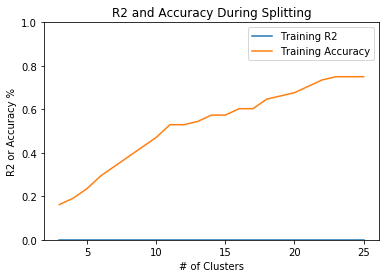

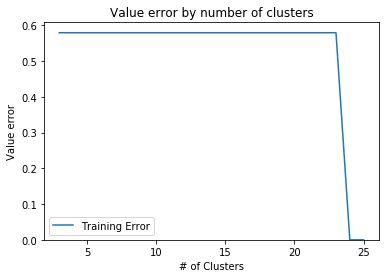

Splitting... |#Clusters:12:  45%|████▌     | 10/22 [00:02<00:02,  4.07it/s]

Splitting... |#Clusters:13:  50%|█████     | 11/22 [00:02<00:03,  3.62it/s]

Splitting... |#Clusters:14:  55%|█████▍    | 12/22 [00:02<00:03,  3.27it/s]

Splitting... |#Clusters:15:  59%|█████▉    | 13/22 [00:03<00:02,  3.04it/s]

Splitting... |#Clusters:16:  64%|██████▎   | 14/22 [00:03<00:03,  2.62it/s]

Splitting... |#Clusters:17:  68%|██████▊   | 15/22 [00:04<00:03,  2.33it/s]

Splitting... |#Clusters:18:  73%|███████▎  | 16/22 [00:04<00:02,  2.26it/s]

Splitting... |#Clusters:19:  77%|███████▋  | 17/22 [00:05<00:02,  2.31it/s]

Splitting... |#Clusters:20:  82%|████████▏ | 18/22 [00:05<00:01,  2.44it/s]

Splitting... |#Clusters:21:  86%|████████▋ | 19/22 [00:05<00:01,  2.62it/s]

Splitting... |#Clusters:22:  91%|█████████ | 20/22 [00:06<00:00,  2.78it/s]

Splitting... |#Clusters:23:  95%|█████████▌| 21/22 [00:06<00:00,  2.96it/s]

Splitting... |#Clusters:23:  95%|█████████▌| 21/22 [00:06<00:00,  3.07it/s]

Optimal # of clusters reached


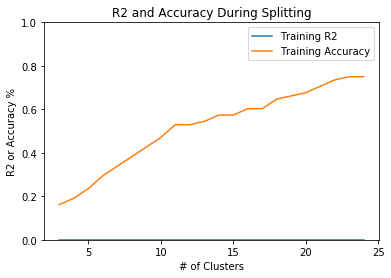

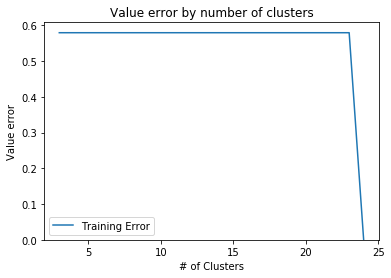

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


    ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0    0     0   0.877380  -0.022002      0 -0.004           0   
1    0     1   0.697367  -0.838886      2 -0.004           0   
2    0     2   1.243616  -0.187872      0 -0.004           1   
3    0     3   1.194918  -0.284411      2 -0.004           1   
4    0     4   2.195323  -0.764018      1 -0.004           2   
..  ..   ...        ...        ...    ...    ...         ...   
63   2    20   3.399181  -2.435424      2 -0.004          13   
64   2    21   3.951357  -2.126681      0 -0.004          13   
65   2    22   3.749557  -1.351670      2 -0.004           8   
66   2    23   4.730149  -1.862744      1 -0.004           9   
67   2    24   4.713666  -2.726934      1 -0.004          14   

                                          x_t2  \
0   [0.21017752262029965, -0.8550819699395595]   
1    [1.2893911119752768, -0.7869577266792496]   
2    [1.0920662960831764, -0.3901149715328337]   
3     [2.247755168004683, -0.77

100%|██████████| 100/100 [01:54<00:00,  1.15s/it]
Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

N= 3  completed
Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.877380  -0.022002      0 -0.004           0        0   
1     0     1   0.697367  -0.838886      2 -0.004           0        0   
2     0     2   1.243616  -0.187872      0 -0.004           1        0   
3     0     3   1.194918  -0.284411      2 -0.004           1        0   
4     0     4   2.195323  -0.764018      1 -0.004           2        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
113   4    20   3.258398  -3.108609      2 -0.004          18        0   
114   4    21   3.598067  -3.652361      0 -0.004          18        0   
115   4    22   3.730016  -2.956302      1 -0.004          13        0   
116   4    23   3.516287  -3.427061      0 -0.004          18        0   
117   4    24   3.024403  -2.178761      0 -0.004          13        0   

    NEXT_CLUSTER  
0              0  
1              0  
2              0 

Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:03<00:05,  2.29it/s]

Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:04<00:04,  2.21it/s]

Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:04<00:04,  2.13it/s]

Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:05<00:04,  2.16it/s]

Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:05<00:03,  2.25it/s]

Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:05<00:02,  2.37it/s]

Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:06<00:02,  2.49it/s]

Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:06<00:02,  2.45it/s]

Splitting... |#Clusters:21:  83%|████████▎ | 19/23 [00:07<00:01,  2.49it/s]

Splitting... |#Clusters:22:  87%|████████▋ | 20/23 [00:07<00:01,  2.49it/s]

Splitting... |#Clusters:23:  91%|█████████▏| 21/23 [00:07<00:00,  2.59it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:08<00:00,  2.65it/s]

Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:08<00:00,  2.57it/s]

Optimal # of clusters reached


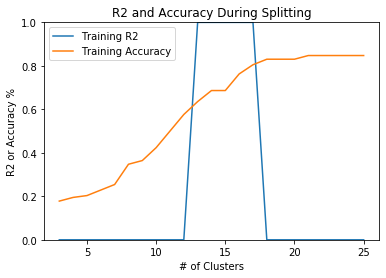

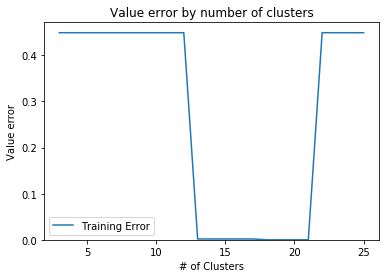

Splitting... |#Clusters:13:  69%|██████▉   | 11/16 [00:03<00:01,  2.77it/s]

Splitting... |#Clusters:14:  75%|███████▌  | 12/16 [00:03<00:01,  2.65it/s]

Splitting... |#Clusters:15:  81%|████████▏ | 13/16 [00:03<00:01,  2.55it/s]

Splitting... |#Clusters:16:  88%|████████▊ | 14/16 [00:04<00:00,  2.40it/s]

Splitting... |#Clusters:17:  94%|█████████▍| 15/16 [00:04<00:00,  2.43it/s]

Splitting... |#Clusters:17:  94%|█████████▍| 15/16 [00:05<00:00,  2.92it/s]

Optimal # of clusters reached


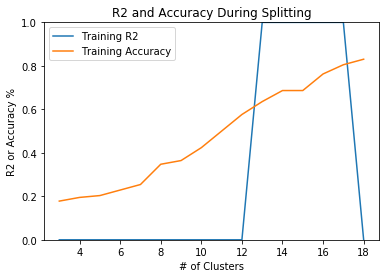

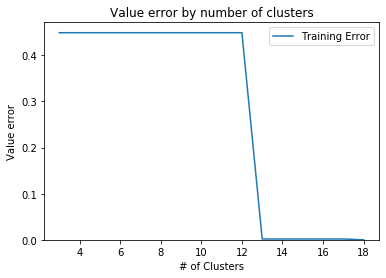

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0     0     0   0.877380  -0.022002      0 -0.004           0   
1     0     1   0.697367  -0.838886      2 -0.004           0   
2     0     2   1.243616  -0.187872      0 -0.004           1   
3     0     3   1.194918  -0.284411      2 -0.004           1   
4     0     4   2.195323  -0.764018      1 -0.004           2   
..   ..   ...        ...        ...    ...    ...         ...   
113   4    20   3.258398  -3.108609      2 -0.004          18   
114   4    21   3.598067  -3.652361      0 -0.004          18   
115   4    22   3.730016  -2.956302      1 -0.004          13   
116   4    23   3.516287  -3.427061      0 -0.004          18   
117   4    24   3.024403  -2.178761      0 -0.004          13   

                                           x_t2  \
0      [0.6354306807242089, -0.865858849311206]   
1    [1.1600654578937104, -0.11659632424687194]   
2    [1.0581443547848748, -0.45939652299352807]   
3     [2.893983

100%|██████████| 100/100 [03:07<00:00,  1.88s/it]

N= 5  completed


In [23]:
# creating new dataset and saving model and policies
ms2 = []
ps2 = []
for n in Ns:
    df = df_full.loc[df_full['ID']<n]
    
    m = MDP_model()
    m.fit(df, # df: dataframe in the format ['ID', 'TIME', ...features..., 'RISK', 'ACTION']
        pfeatures, # int: number of features
        h, # int: time horizon (# of actions we want to optimize)
        max_k, # int: number of iterations
        distance_threshold, # clustering diameter for Agglomerative clustering
        cv, # number for cross validation
        th, # splitting threshold
        classification, # classification method
        split_classifier_params, # classification params
        clustering,# clustering method from Agglomerative, KMeans, and Birch
        n_clusters, # number of clusters for KMeans
        random_state,
        plot=True, 
        optimize=True)
    ms2.append(m)
    pickle.dump(m, open('subset_model_N=%i.sav'%n, 'wb'))
    
    f, r = get_maze_transition_reward(mazes[4])
    Q, p, x_df = fitted_Q(100, df, 0.98, 2, [0, 1, 2, 3], f, r, True, 'ExtraTrees')
    pickle.dump(p, open('subset_fitted_Q_policy_N=%i.sav'%n, 'wb'))
    ps2.append(p)
    print('N=', n, ' completed')